### Unsupervised Machine Learning
Assignment #2 <br>
Applying PCA and LDA <br>
Michael Zwartz<br>

Star type classification set: https://www.kaggle.com/datasets/brsdincer/star-type-classification

#### Feature Extraction Techniques
Principal component analysis and linear discriminant analysis are methods of feature extration. These methods are used on high dimensional data to help visulaize or run machine learning algorithms more efficiently. In data science there's a common phrase when using data with many features: the curse of dimensionality. This phrase refers to the fact that data with more features becomes more difficult to analyze. This is becuase the data is either more difficult to visulaize or becasue an algorithm has more computation to power through with each added feature. PCA and LDA are common methods for dealing with the curse of dimensionality. These techniques are built to transform data from many dimensions down to as few as a single dimension. Both PCA and LDA retain the information from all the features that they reduce down. The main difference is that LDA maintains the class structure while PCA does not. PCA generally works better for simpiler datasets while LDA is most commonly used on more complex datasets. 


#### Algorithm Design
**PCA**
Principal component alaysis is the simpliler of the two techniques. The basics idea is that each instance is multiplied by the eigenvector associated with the highest eigenvalue calculated from the covariance matrix of features. PCA is completed with the following steps <br>
1. Upload and clean dataset
2. Calculate the covariance matrix
3. Find the Eigenvectors and Eigenvalues
4. Sort the Eigenvalues from highest to lowest
5. Choose the number of features in the output
6. Multiply the dataset by the eigenvectors associated with the largest eigenvalues

**LDA**
Linear discriminant analysis is a more complex process becuase its purpose is to maintain the class structure. To do this, LDA will calculate the mean for each class. One task of LDA is to maximize the distance between sample means.LDA is completed in the following steps: 
1. Upload and clean dataset
2. Find the mean values for each class and for the dataset as a whole
3. Caculate the covariance for each class
4. Find the sum of the covariance mitricies 
5. Square the difference of the class means
6. Take the inverse of the summed covariance matrix
7. Calculate the eigenvectors and eigenvalues of the summed covariance matrix
8. Multiply each class by the eigenvector associated with the first eigenvalue


### Code and Results
*Analysis to follow*


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
stars = pd.read_csv("Stars.csv")

#create list of colors from dataset
color = ['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White']

#create list of spectarl classes in dataset
spectral_class = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
#https://en.wikipedia.org/wiki/Asteroid_spectral_types

#create dictionary for star types
type_dict = {0: 'Red Dwarf', 1: "Brown Dwarf", 2: "White Dwarf", 3: "Main Sequence",
             4: "Super Giants", 5: "Hyper Giants"}

In [2]:
#replace color strings with number as index from color list
for clr in stars['Color']:
    stars['Color'] = stars['Color'].replace(clr, color.index(clr))
    
#replace spectral class category character with number as index from spectral class list
for sp_cla in stars['Spectral_Class']:
    stars['Spectral_Class'] = stars['Spectral_Class'].replace(sp_cla, spectral_class.index(sp_cla))

In [3]:
#remove the Type classification feature from the data set for PCA analysis
PCA_stars = stars[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]

#calculate the eigenvalues and eigenvectors
eigen_val, eigen_vec = np.linalg.eig(PCA_stars.cov())

#sort the eigenvalues from highest to lowest
sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenvalue = eigen_val[sorted_index]

#sort the eigenvectors to match values
sorted_eigenvec = eigen_vec[:,sorted_index]


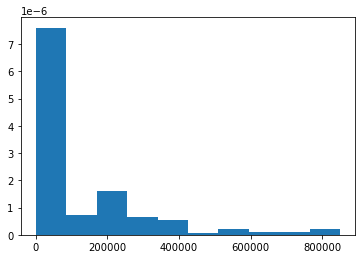

In [4]:
#select eigenvector to reduce the data set to 1D
w1 = sorted_eigenvec[:, 0:1]

#dot productor of eigenvector and dataset
stars1D = np.dot(w1.transpose(), PCA_stars.transpose()).transpose()

#create plot
plot1 = plt.hist(stars1D, density=True)

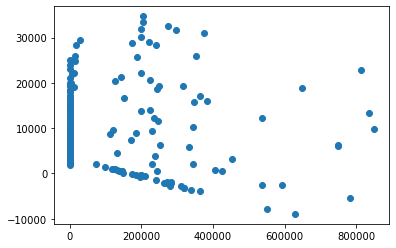

In [5]:
#select eigenvector to reduce the data set to 2D
w2 = sorted_eigenvec[:, 0:2]

#dot productor of eigenvector and dataset
stars2D = np.dot(w2.transpose(), PCA_stars.transpose()).transpose()

#create plot
plot2 = plt.scatter(stars2D[:,0], stars2D[:,1])

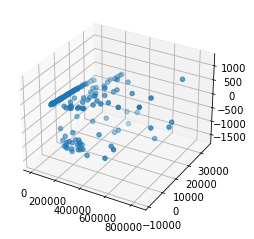

In [6]:
#select eigenvector to reduce the data set to 3D
w3 = sorted_eigenvec[:, 0:3]

#dot productor of eigenvector and dataset
stars3D = np.dot(w3.transpose(), PCA_stars.transpose()).transpose()

#create plot
plot3 = plt.figure()
ax = plot3.add_subplot(projection='3d')
ax.scatter(stars3D[:,0], stars3D[:,1], stars3D[:,2])
plt.show()

In [7]:
#LDA 
LDA_stars = stars[['Temperature', 'L', 'A_M', 'Type']]

#define features 
X1 = stars['Temperature']
X2 = stars['L']
X3 = stars['A_M']

target = stars['Type']

Red_Dwarf = LDA_stars[LDA_stars['Type']==0]
#Brown_Dwarf = LDA_stars[LDA_stars['Type']==1]
#White_Dwarf = LDA_stars[LDA_stars['Type']==2]
Main_Sequence = LDA_stars[LDA_stars['Type']==3]
#Super_Giant = LDA_stars[LDA_stars['Type']==4]
Hyper_Giant = LDA_stars[LDA_stars['Type']==5]

In [16]:
#find class averages
mu1 = np.average(Red_Dwarf)
mu2 = np.average(Main_Sequence)
mu3 = np.average(Hyper_Giant)

mu = np.average(LDA_stars)

#calcualte covariance matrix
S1 = np.cov(Red_Dwarf)
S2 = np.cov(Main_Sequence)
S3 = np.cov(Hyper_Giant)

In [17]:
#print("S1 shape " , S1.shape)
#print("S2 shape " , S2.shape)
#print("S3 shape " , S3.shape)

print(Red_Dwarf.shape)
print(Main_Sequence.shape)
print(Hyper_Giant.shape)

(40, 4)
(40, 4)
(40, 4)


In [11]:
#sum covariance matricies
Sw = S1 + S2 + S3

#square the sum 
Sb = (mu1-mu2-mu3)*(mu1-mu2-mu3)

#take the inverse 
invSw = np.linalg.inv(Sw)
invSw2 = invSw * Sb 

#calculate eigenvalues
v, d = np.linalg.eig(invSw2)
w = v[:1]
#multiply featurs by eigenvectors 
y1 = X1*w
y2 = X2*w
y3 = X3*w


c:\Users\mzwartz\Anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\mzwartz\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\mzwartz\Anaconda3\lib\site-packages\matplotlib\collections.py:566: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(self.convert_xunits(offsets[:, 0]), 'float'),
c:\Users\mzwartz\Anaconda3\lib\site-packages\matplotlib\collections.py:567: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asarray(self.convert_yunits(offsets[:, 1]), 'float')))
c:\Users\mzwartz\Anaconda3\lib\site-packages\matplotlib\colors.py:277: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


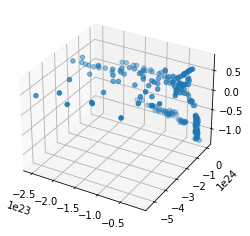

In [9]:
#create plot
plot4 = plt.figure()
ax = plot4.add_subplot(projection='3d')
ax.scatter(y1, y2, y3)
plt.show()

### Analysis Questions
These results do not quite show what I expected. There are 5 types of stars included in this data set. The 'Type' feature is not included in the dataset used for PCA feature reduction. I expected to see some clustering of the data in different dimensions. In all of the graphs, there is a large cluster of data points close to 0. In the PCA feature reduction histogram this cluster is much higher than I expected. I expected to see a more normalized distribution. In the histogram there is also a significant peak around the 2000 mark. I think this cluster is represented in both the 2D and 3D scatter plot as well. In the 2D plot, there's a linear trend centered on the 2000 mark of the x-axis. On the 3D plot, that cluster can be seen too. <br>

The LDA scatter plot is also not quite what I expected but does show a few clear clusters. To complete the LDA feature reduction, I focused only on 3 of the star types. I chose the smallest, middle, and largest star types. I expected this to seperated more in the scatter plot. <br>

The first thing these results indicate to me is that maybe these star types aren't as easily defined as I expeced. It's possible that the line between a red dwarf and a white dwarf star isn't as clearly defined as I thought. I also think it would be valuable to look at the dataset more in depth to understand how each feature is defined and measured. With a quick glance back at the dataset, the relative luminocity ranges from 0.002 to 200000. This is a huge range and could explain the large spike close to 0 in all the charts. Understanding how these features are used in star classification might help build a more effective feature reduction algorithm. 